# CO543 - Image Processing
## Lab 04

- E/19/129
- K. H. Gunawardana


In [1]:
# import os
# from google.colab import drive

# path = "/content/drive/My Drive/ML/CO543/lab04/"

# # Mount Google Drive
# drive.mount('/content/drive')

In [2]:
# import modules
import cv2
import numpy as np
import pandas as pd
# %matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
def showImg(I, name="Image"):
    plt.figure(figsize=(10, 8))
    if len(I.shape) == 2:
        plt.imshow(I, cmap='gray')
    else:
        plt.imshow(I)

    plt.title(name)
    plt.show()

def show2Img(A, B, title=None, A_name="Original Image", B_name="Output Image"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

    if len(A.shape) == 2:
        ax1.imshow(A, cmap='gray')
    else:
        ax1.imshow(A)
    ax1.set_title(A_name)

    if len(B.shape) == 2:
        ax2.imshow(B, cmap='gray')
    else:
        ax2.imshow(B)
    ax2.set_title(B_name)

    plt.show()

def viewImg(A):
    cv2.imshow('image',A)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits

In [5]:
# Load the dataset
path = "E:\\Education\\Academic\\3rd YEAR\\6th Sem\\CO543 Image Processing\\data\\lab04\\part01\\"

mnist = pd.read_csv(path + 'train.csv')

# Separate features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality with PCA to visualize in 2D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [6]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Elbow Method
wcss = []
for i in range(4, 24, 2):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method
silhouette_scores = []
for i in range(4, 24, 2):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

In [7]:
# Applying K-Means with the chosen number of clusters
optimal_clusters = 16
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
mnist['cluster'] = y_kmeans


f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


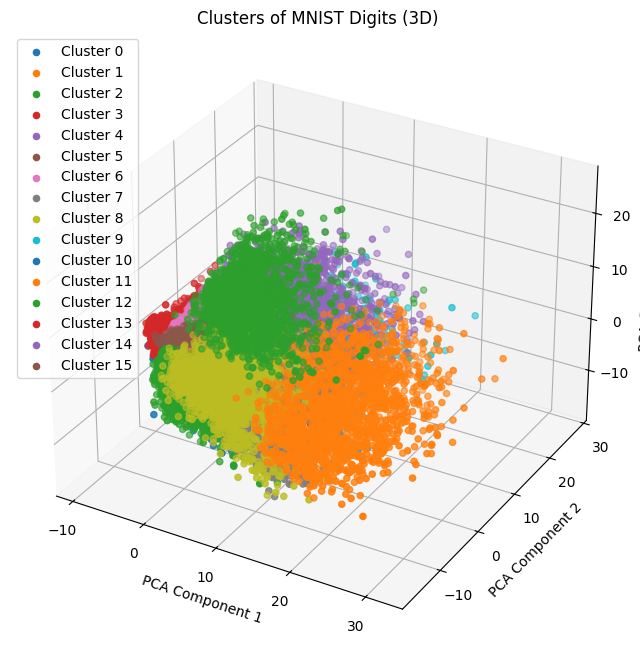

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_clusters):
    ax.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2], label=f'Cluster {i}')

ax.set_title('Clusters of MNIST Digits (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

# Enable interactivity for rotation
# plt.show()

In [15]:
# Investigate misclustered images
misclustered_examples = []

for i in range(optimal_clusters):
    cluster_indices = np.where(y_kmeans == i)[0]
    true_labels = y[cluster_indices]
    most_common_label = np.bincount(true_labels).argmax()

    misclustered = cluster_indices[true_labels != most_common_label]
    if len(misclustered) > 0:
        misclustered_examples.append((i, misclustered, cluster_indices))

# Display misclustered images
for cluster, indices, cluster_indices in misclustered_examples:
    print(f"Cluster {cluster} has misclustered images: {len(indices)} out of {len(cluster_indices)}")


Cluster 0 has misclustered images: 1476 out of 3378
Cluster 1 has misclustered images: 61 out of 495
Cluster 2 has misclustered images: 1421 out of 2935
Cluster 3 has misclustered images: 1984 out of 6499
Cluster 4 has misclustered images: 1175 out of 2313
Cluster 5 has misclustered images: 1805 out of 3269
Cluster 6 has misclustered images: 3959 out of 5982
Cluster 7 has misclustered images: 284 out of 2144
Cluster 8 has misclustered images: 911 out of 1767
Cluster 9 has misclustered images: 413 out of 706
Cluster 10 has misclustered images: 692 out of 1844
Cluster 11 has misclustered images: 130 out of 1668
Cluster 12 has misclustered images: 94 out of 1654
Cluster 13 has misclustered images: 872 out of 3081
Cluster 14 has misclustered images: 211 out of 1321
Cluster 15 has misclustered images: 426 out of 2944


### END